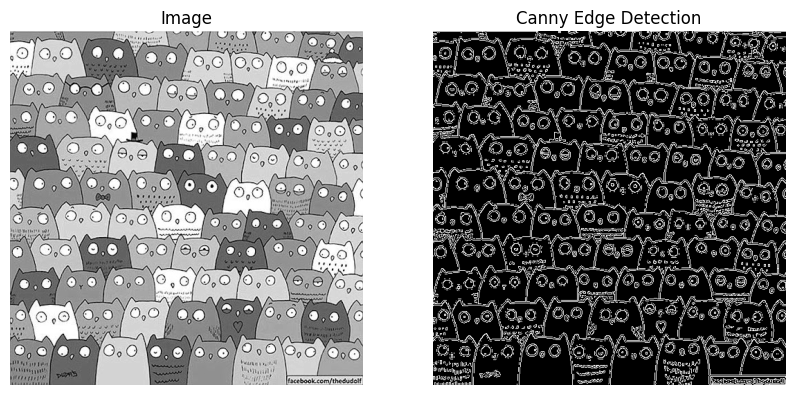

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image_path = "cat.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

edges = cv2.Canny(image, 100, 200)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap="gray")
plt.title("Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap="gray")
plt.title("Canny Edge Detection")
plt.axis("off")

plt.show()


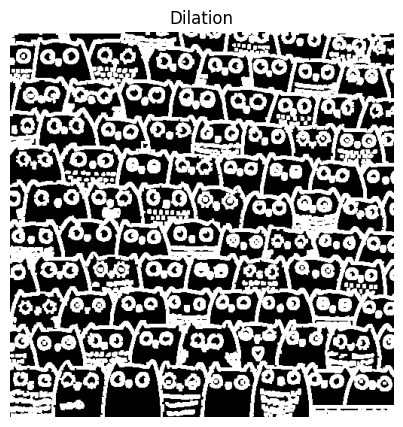

In [16]:

kernel = np.ones((3,3), np.uint8) 
edges_dilated = cv2.dilate(edges, kernel, iterations=1)

plt.figure(figsize=(5, 5))
plt.imshow(edges_dilated, cmap="gray")
plt.title("Dilation")
plt.axis("off")
plt.show()


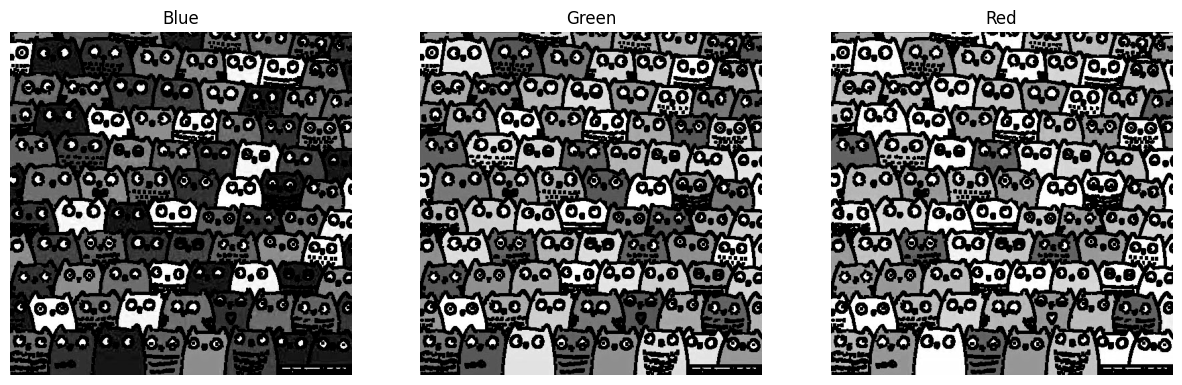

In [17]:
image_rgb = cv2.imread("cat.jpg", cv2.IMREAD_COLOR)
blue_channel, green_channel, red_channel = cv2.split(image_rgb)

blue_subtract = cv2.subtract(blue_channel, edges_dilated)
green_subtract = cv2.subtract(green_channel, edges_dilated)
red_subtract = cv2.subtract(red_channel, edges_dilated)

image_merged = cv2.merge((blue_subtract, green_subtract, red_subtract))
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(blue_subtract, cmap="gray")
axs[0].set_title("Blue")

axs[1].imshow(green_subtract, cmap="gray")
axs[1].set_title("Green")

axs[2].imshow(red_subtract, cmap="gray")
axs[2].set_title("Red")

for ax in axs:
    ax.axis("off")



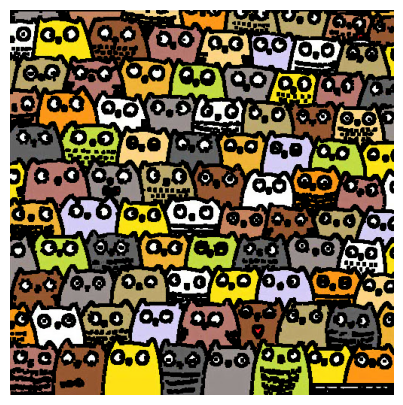

In [18]:
plt.show()
plt.figure(figsize=(5, 5))
plt.imshow(cv2.cvtColor(image_merged, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

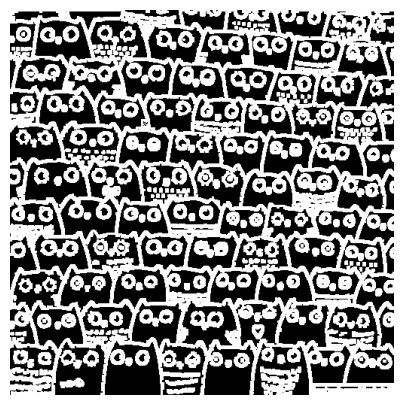

In [19]:
image_binary = cv2.threshold(cv2.cvtColor(image_merged, cv2.COLOR_BGR2GRAY), 1, 255, cv2.THRESH_BINARY_INV)[1]

plt.figure(figsize=(5, 5))
plt.imshow(image_binary, cmap="gray")
plt.axis("off")
plt.show()


In [20]:

num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(image_binary, connectivity=8)

area_threshold = 120
large_black_regions = sum(1 for stat in stats if stat[cv2.CC_STAT_AREA] > area_threshold)

large_black_regions


94

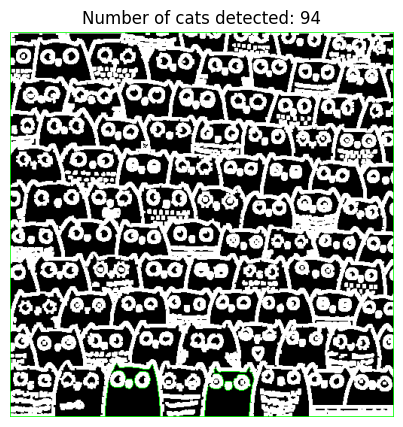

94

In [21]:
_, binary = cv2.threshold(image_binary, 50, 255, cv2.THRESH_BINARY_INV)

dist_transform = cv2.distanceTransform(binary, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.4 * dist_transform.max(), 255, 0)

sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(binary, sure_fg)

markers = cv2.connectedComponents(sure_fg)[1]
markers = markers + 1  
markers[unknown == 255] = 0  

image_color = cv2.cvtColor(image_binary, cv2.COLOR_GRAY2BGR)
cv2.watershed(image_color, markers)
image_color[markers == -1] = [0, 255, 0] 
num_owls = len(np.unique(markers)) - 2  

plt.figure(figsize=(10,5))
plt.imshow(image_color)
plt.title(f"Number of cats detected: {large_black_regions}")
plt.axis("off")
plt.show()

large_black_regions